# Prediction of clothing sizes with the help of different KNN methods

Option to remove warnings

In [1]:
import warnings
warnings.filterwarnings("ignore")  # "error", "ignore", "always", "default", "module" or "once"

In [2]:
import pandas as pd
import seaborn as sns
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def div_conversion(df, column, div):
    return df[column].apply(lambda x: x/div)

male_df = pd.read_csv("male.csv")
male_sizes = male_df[["stature", "weightkg"]]
male_sizes["stature"] = div_conversion(male_sizes, "stature", 10)
male_sizes["weightkg"] = div_conversion(male_sizes, "weightkg", 10)
m=(male_sizes.dtypes=='float')
male_sizes.loc[:,m]=male_sizes.loc[:,m].astype(int)
male_sizes.to_csv("male_sizes.csv", index=False)
male_sizes = pd.read_csv("male_sizes.csv")

female_df = pd.read_csv("female.csv")
female_sizes = female_df[["stature", "weightkg"]]
female_sizes["stature"] = div_conversion(female_sizes, "stature", 10)
female_sizes["weightkg"] = div_conversion(female_sizes, "weightkg", 10)
m=(female_sizes.dtypes=='float')
female_sizes.loc[:,m]=female_sizes.loc[:,m].astype(int)
female_sizes.to_csv("female_sizes.csv", index=False)
female_sizes_with_size = pd.read_csv("female_sizes.csv")

In [3]:
print("Male stature\n", male_sizes["stature"].describe(), "\nNull values:\t", any(male_sizes["stature"].isnull()),"\n")
print("Male weightkg\n", male_sizes["weightkg"].describe(), "\nNull values:\t", any(male_sizes["weightkg"].isnull()))

print("Female stature\n", female_sizes["stature"].describe(), "\nNull values:\t", any(female_sizes["stature"].isnull()),"\n")
print("Female weightkg\n", female_sizes["weightkg"].describe(), "\nNull values:\t", any(female_sizes["weightkg"].isnull()))

Male stature
 count    4082.000000
mean      175.182999
std         6.866820
min       149.000000
25%       171.000000
50%       175.000000
75%       180.000000
max       199.000000
Name: stature, dtype: float64 
Null values:	 False 

Male weightkg
 count    4082.000000
mean       85.075208
std        14.219823
min        39.000000
25%        75.000000
50%        84.000000
75%        94.000000
max       144.000000
Name: weightkg, dtype: float64 
Null values:	 False
Female stature
 count    1986.000000
mean      162.397784
std         6.428124
min       140.000000
25%       158.000000
50%       162.000000
75%       167.000000
max       182.000000
Name: stature, dtype: float64 
Null values:	 False 

Female weightkg
 count    1986.000000
mean       67.315710
std        10.999223
min        35.000000
25%        60.000000
50%        66.000000
75%        74.000000
max       119.000000
Name: weightkg, dtype: float64 
Null values:	 False


In [4]:
male_sizes.loc[(male_sizes["stature"]<=1000) & (male_sizes["weightkg"]<=1000), "SizeShirt"] = "XXL/XXXL"
male_sizes.loc[(male_sizes["stature"]<=190) & (male_sizes["weightkg"]<=110), "SizeShirt"] = "XL/XXL"
male_sizes.loc[(male_sizes["stature"]<=186) & (male_sizes["weightkg"]<=95), "SizeShirt"] = "L/XL"
male_sizes.loc[(male_sizes["stature"]<=182) & (male_sizes["weightkg"]<=75), "SizeShirt"] = "M/L"
male_sizes.loc[(male_sizes["stature"]<=178) & (male_sizes["weightkg"]<=65), "SizeShirt"] = "S/M"
male_sizes.loc[(male_sizes["stature"]<=169) & (male_sizes["weightkg"]<=55), "SizeShirt"] = "XS/S"

male_sizes.loc[(male_sizes["stature"]<=1000) & (male_sizes["weightkg"]<=1000), "SizePants"] = "XL/XXL"
male_sizes.loc[(male_sizes["stature"]<=200) & (male_sizes["weightkg"]<=120), "SizePants"] = "L/XL"
male_sizes.loc[(male_sizes["stature"]<=190) & (male_sizes["weightkg"]<=110), "SizePants"] = "M/L"
male_sizes.loc[(male_sizes["stature"]<=186) & (male_sizes["weightkg"]<=95), "SizePants"] = "S/M"
male_sizes.loc[(male_sizes["stature"]<=182) & (male_sizes["weightkg"]<=75), "SizePants"] = "XS/S"
male_sizes.loc[(male_sizes["stature"]<=178) & (male_sizes["weightkg"]<=65), "SizePants"] = "XXS/XS"
male_sizes.loc[(male_sizes["stature"]<=169) & (male_sizes["weightkg"]<=55), "SizePants"] = "XXS"

male_sizes.to_csv("male_sizes.csv", index=False)

female_sizes.loc[(female_sizes["stature"]<=1000) | (female_sizes["weightkg"]<=1000), "SizeShirt"] = "XL/XXL"
female_sizes.loc[(female_sizes["stature"]<=184) & (female_sizes["weightkg"]<=80), "SizeShirt"] = "L/XL"
female_sizes.loc[(female_sizes["stature"]<=180) & (female_sizes["weightkg"]<=75), "SizeShirt"] = "M/L"
female_sizes.loc[(female_sizes["stature"]<=176) & (female_sizes["weightkg"]<=70), "SizeShirt"] = "S/M"
female_sizes.loc[(female_sizes["stature"]<=172) & (female_sizes["weightkg"]<=65), "SizeShirt"] = "XS/S"
female_sizes.loc[(female_sizes["stature"]<=168) & (female_sizes["weightkg"]<=60), "SizeShirt"] = "XXS/XS"
female_sizes.loc[(female_sizes["stature"]<=160) & (female_sizes["weightkg"]<=55), "SizeShirt"] = "XXS"

female_sizes.loc[(female_sizes["stature"]<=1000) | (female_sizes["weightkg"]<=1000), "SizePants"] = "XXL/XXXL"
female_sizes.loc[(female_sizes["stature"]<=184) & (female_sizes["weightkg"]<=80), "SizePants"] = "XL/XXL"
female_sizes.loc[(female_sizes["stature"]<=180) & (female_sizes["weightkg"]<=75), "SizePants"] = "L/XL"
female_sizes.loc[(female_sizes["stature"]<=176) & (female_sizes["weightkg"]<=70), "SizePants"] = "M/L"
female_sizes.loc[(female_sizes["stature"]<=172) & (female_sizes["weightkg"]<=65), "SizePants"] = "S/M"
female_sizes.loc[(female_sizes["stature"]<=168) & (female_sizes["weightkg"]<=60), "SizePants"] = "XXS/XS"
female_sizes.loc[(female_sizes["stature"]<=160) & (female_sizes["weightkg"]<=55), "SizePants"] = "XXS"

female_sizes.to_csv("female_sizes.csv", index=False)

In [5]:
gender = input("Are you male or female?")
datasetgr = pd.read_csv("female_sizes.csv") if gender == "female" else pd.read_csv("male_sizes.csv")

# Filter through values and remove nans

In [6]:
male_sizes.isnull().values.any()
b = datasetgr

idx, idy = np.where(pd.isnull(b))
result = np.column_stack([b.index[idx], b.columns[idy]])
if idx != []:
    print(f"{gender} Dataframe contains Nan values at index position {idx++2} ")
else:
    print(f"{gender} Dataframe contains zero Nan values")

 Dataframe contains zero Nan values


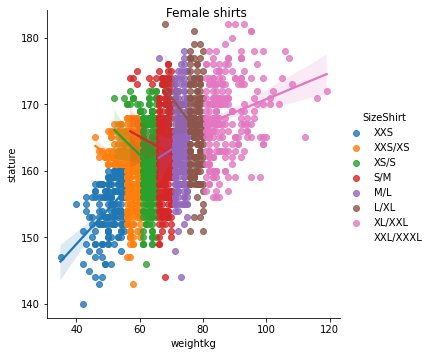

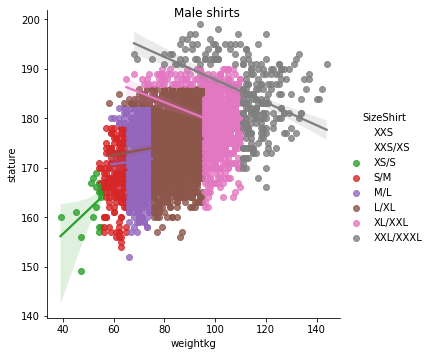

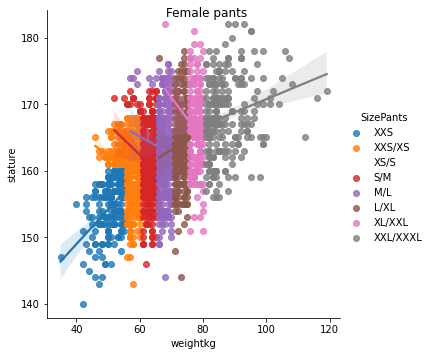

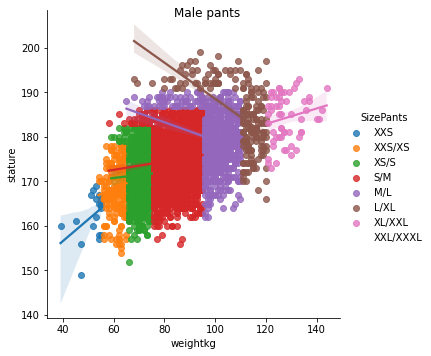

In [7]:
hue_size = ["XXS", "XXS/XS", "XS/S", "S/M","M/L","L/XL","XL/XXL","XXL/XXXL" ]

lm = sns.lmplot(data= female_sizes, x="weightkg", y="stature", hue="SizeShirt", hue_order=hue_size, legend=True)
fig = lm.fig
fig.suptitle("Female shirts", fontsize=12)
lm2 = sns.lmplot(data= male_sizes, x="weightkg", y="stature", hue="SizeShirt",hue_order=hue_size, legend=True)
fig2 = lm2.fig
fig2.suptitle("Male shirts", fontsize=12)
lm3 = sns.lmplot(data= female_sizes, x="weightkg", y="stature", hue="SizePants", hue_order=hue_size, legend=True)
fig3 = lm3.fig
fig3.suptitle("Female pants", fontsize=12)
lm4 = sns.lmplot(data= male_sizes, x="weightkg", y="stature", hue="SizePants",hue_order=hue_size, legend=True)
fig4 = lm4.fig
fig4.suptitle("Male pants", fontsize=12)
print()

In [8]:
datasetgr.head()

,stature,weightkg,SizeShirt,SizePants
0,177,81,L/XL,S/M
1,170,72,M/L,XS/S
2,173,92,L/XL,S/M
3,165,79,L/XL,S/M
4,191,94,XXL/XXXL,L/XL


In [9]:
datasetgr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4082 entries, 0 to 4081
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   stature    4082 non-null   int64 
 1   weightkg   4082 non-null   int64 
 2   SizeShirt  4082 non-null   object
 3   SizePants  4082 non-null   object
dtypes: int64(2), object(2)
memory usage: 127.7+ KB


In [10]:
XX=datasetgr.iloc[:,0:2]
X=pd.get_dummies(XX)
Y1=datasetgr.iloc[:,2]
Y2=datasetgr.iloc[:,3]

In [11]:
datasetgr.shape

(4082, 4)

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y1,test_size=0.2, train_size=0.8)

In [13]:
print(X_train.shape)
print(X_test.shape)

(3265, 2)
(817, 2)


In [14]:
print(Y_train.shape)
print(Y_test.shape)
print(Y_train)

(3265,)
(817,)
3006    XL/XXL
524     XL/XXL
1360      L/XL
3267      L/XL
1531      L/XL
         ...  
2015      L/XL
2111       M/L
675       L/XL
687        M/L
574       L/XL
Name: SizeShirt, Length: 3265, dtype: object


In [15]:
print(Y_test)

273          M/L
1799      XL/XXL
1191        L/XL
874         L/XL
3109        XS/S
          ...   
433         L/XL
2916         M/L
1307      XL/XXL
805         L/XL
3442    XXL/XXXL
Name: SizeShirt, Length: 817, dtype: object


In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import  metrics
k_range = range(1,10)
scores = {}
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(Y_test, Y_pred)
    scores_list.append(metrics.accuracy_score(Y_test, Y_pred))

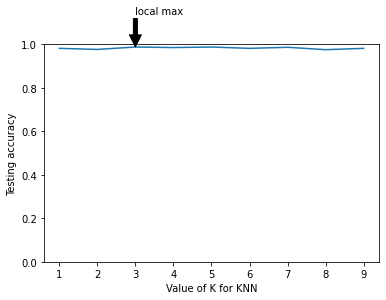

Best k value is 3


In [17]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

x=k_range
y=scores_list
line, = ax.plot(x, y)

y_max_plot = max(y)
x_pos = y.index(y_max_plot)
best_k_value = x[x_pos]
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing accuracy")
ax.annotate('local max', xy=(best_k_value, y_max_plot), xytext=(best_k_value, y_max_plot+0.15), arrowprops=dict(facecolor='black', shrink=0.005))

ax.set_ylim(0,1)
plt.show()
print(f"Best k value is {best_k_value}")

In [18]:
from sklearn.svm import SVC

KNN_kd_tree_shirt= KNeighborsClassifier(n_neighbors=best_k_value,weights='uniform')
KNN_kd_tree_shirt.fit(X, Y1)

KNN_brute_shirt= KNeighborsClassifier(n_neighbors=best_k_value,weights="uniform",algorithm="brute",)
KNN_brute_shirt.fit(X, Y1)

KNN_kd_tree_pants= KNeighborsClassifier(n_neighbors=best_k_value,weights='uniform')
KNN_kd_tree_pants.fit(X, Y2)

KNN_brute_pants= KNeighborsClassifier(n_neighbors=best_k_value,weights="uniform",algorithm="brute",)
KNN_brute_pants.fit(X, Y2)

#chestcircumference
weight = input("Enter your weight (kg):")
#waistcircumference
height = input("Enter your height (cm):")

classes = {0:"test1"}
X_new = [[weight,height]]
Y_predict = KNN_kd_tree_shirt.predict(X_new)
Y_predict2 = KNN_brute_shirt.predict(X_new)
Y_predict3 = KNN_kd_tree_pants.predict(X_new)
Y_predict4 = KNN_brute_pants.predict(X_new)

def k_nearest_neighborshirt(df, p: list, k: int):
    def vec_abs(vec):
        return sqrt(sum([unit**2 for unit in vec]))

    def compute_vec(p_1, p_2):
        return [p_2[col] - p_1[col] for col in range(2)]

    points = []
    for row in range(df.shape[0]):
        point = [df["weightkg"][row], df["stature"][row]]
        vec = compute_vec(p, point)
        points.append((df["SizeShirt"][row] ,vec_abs(vec)))

    cluster = [size[0] for size in sorted(points, key=lambda y: Y1[1])[:k]]

    del points
    cluster_point = {i: cluster.count(i) for i in cluster}
    return max(cluster_point, key=cluster_point.get)

size = k_nearest_neighborshirt(datasetgr, [float(weight), float(height)], best_k_value)

def k_nearest_neighborpants(df, p: list, k2: int):
    def vec_abs(vec):
        return sqrt(sum([unit**2 for unit in vec]))

    def compute_vec(p_1, p_2):
        return [p_2[col] - p_1[col] for col in range(2)]

    points2 = []
    for row in range(df.shape[0]):
        point = [df["weightkg"][row], df["stature"][row]]
        vec = compute_vec(p, point)
        points2.append((df["SizePants"][row] ,vec_abs(vec)))

    cluster2 = [size[0] for size in sorted(points2, key=lambda y: Y2[1])[:k2]]
    del points2
    cluster2_point2 = {i: cluster2.count(i) for i in cluster2}
    return max(cluster2_point2, key=cluster2_point2.get)


size2 = k_nearest_neighborpants(datasetgr, [float(weight), float(height)], best_k_value)

svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, Y_train)

Y_predict5 = svclassifier.predict(X_new)
Y_predict6 = svclassifier.predict(X_new)
print(f"Your predicted clothing size by manual KNN : Shirt {size} , Pants {size2}" )
print(f"Your predicted clothing size by sklearn KNN kd_tree: {Y_predict[0]}, Pants {Y_predict3[0]}")
print(f"Your predicted clothing size by sklearn KNN brute: {Y_predict2[0]}, Pants {Y_predict4[0]}")
print(f"Your predicted clothing size by svclassifier: {Y_predict5[0]}, Pants {Y_predict6[0]}")

raw_data = {"ShirtSize": [size,  Y_predict[0], Y_predict2[0],  Y_predict5[0]]}
raw_data2 ={"PantSize": [size2, Y_predict3[0], Y_predict4[0], Y_predict6[0]]}
df = pd.DataFrame(raw_data, columns = ["ShirtSize"])
df2=pd.DataFrame(raw_data2, columns = ["PantSize"])
averageshirt= df["ShirtSize"].describe().top
averagepants=df2["PantSize"].describe().top

print(f"\n\nThe average size result indicated that you should have: \nSize: {averageshirt} as Shirt \nSize:{averagepants} as Pants")
print("\n\n\n Note that this evaluation of sizes is based of total bodyheight and weight, a sizevalue that is very rarely used in deciding "
      "which clothes fit and which do not")

Your predicted clothing size by manual KNN : Shirt L/XL , Pants S/M
Your predicted clothing size by sklearn KNN kd_tree: XXL/XXXL, Pants XL/XXL
Your predicted clothing size by sklearn KNN brute: XXL/XXXL, Pants XL/XXL
Your predicted clothing size by svclassifier: XXL/XXXL, Pants XXL/XXXL


The average size result indicated that you should have: 
Size: XXL/XXXL as Shirt 
Size:XL/XXL as Pants



 Note that this evaluation of sizes is based of total bodyheight and weight, a sizevalue that is very rarely used in deciding which clothes fit and which do not


"So how's your code working?"

![img](https://i.imgflip.com/5kos8n.jpg)

It's a quite good description of this code. The manual KNN is somehow the most accurate of them all as the sklearn KNN most often than not misses the value completely, something I wonder might be due to strange data. I tested 2 of my friends that cover both end of the spectrum. Male 170kg 210cm and female 50kg and 166cm, and it seems to freak the algorithm up since those values only correlate to like 1-3 datapoints, so I think it wants to send it to another nearby datapoint. Though I do not understand why the female testdata of 50kg 166cm gives XL/XXL which is completely wrong, though during those run, the manual KNN is often correct but the 3 other tests are wrong.